In [1]:
from os import walk
import pandas as pd
import numpy as np
from PIL import Image
from sklearn import preprocessing
import numpy as np

In [2]:
import cv2

# Classification part

In [3]:
from tensorflow import keras
classificator = keras.models.load_model('classificator.hd5')

In [4]:
cats = ("dress", "pants", "shoes", "hat")

In [5]:
label_map = {'dress': 0,
             'hat': 1,
             'longsleeve': 2,
             'outwear': 3,
             'pants': 4,
             'shirt': 5,
             'shoes': 6,
             'shorts': 7,
             'skirt': 8,
             't-shirt': 9}

In [6]:
example = "test//hat//2a12baab-f020-42e3-8e6b-5d82e3ed0b55.jpg"

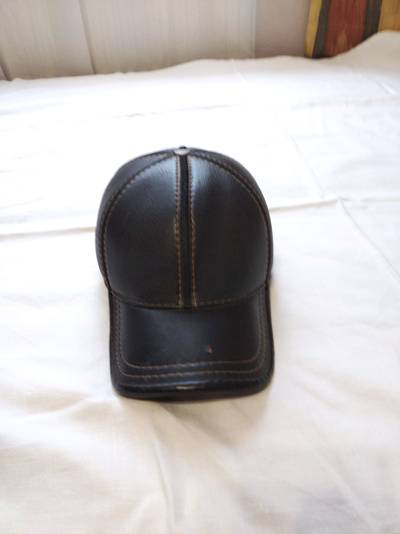

In [7]:
Image.open(example)

In [8]:
hat = cv2.imread(example)
hat = cv2.resize(hat, (250, 250))

In [9]:
hat.reshape(1, *hat.shape).shape

(1, 250, 250, 3)

In [10]:
pred = classificator.predict(hat.reshape(1, *hat.shape))#.round(8)
pred

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.4356396e-30, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [11]:
pred.argmax()

1

In [12]:
inv_label_map = {v:k for k,v in label_map.items()}
pred_category = inv_label_map[pred.argmax()]
pred_category

'hat'

In [13]:
bbox = keras.models.load_model(f'{pred_category}_model//bbox_{pred_category}.h5')

In [14]:
im = cv2.imread(example)
height, width, _ = im.shape
im = cv2.resize(hat, (300, 300))

In [15]:
rectangle = bbox.predict(im.reshape(1, *im.shape))
rectangle

array([[3.1152692e-35, 5.4210225e-23, 1.0000000e+00, 1.0000000e+00]],
      dtype=float32)

In [16]:
x0, y0, x1, y1 = rectangle[0]
x0 *= width
y0 *= height
x1 *= width
y1 *= height

In [17]:
with open("marks_valid_small.txt", "r") as mv:
    marks_valid = mv.readlines()

In [18]:
paths = []
for line in marks_valid:
    if line.startswith("#"):
        category = line.strip()[1:]
    else:
        path="validation\\"+category+"\\"+line.split(";")[0]+".jpg"
        paths.append(path)

In [19]:
paths

['validation\\dress\\3eeaf330-2460-4d7f-844f-d7254d12e587.jpg',
 'validation\\dress\\5ab0c815-c152-4726-b540-42876b23c34a.jpg',
 'validation\\dress\\6ccb3f12-7087-4303-a522-3a76d3db8ce6.jpg',
 'validation\\dress\\07cddef1-1fc8-47e4-a28a-613e60912590.jpg',
 'validation\\dress\\7a80fe51-8dfd-4e62-a65a-b192365731fa.jpg',
 'validation\\dress\\19e4de0d-fb90-47c2-83b4-37e3652c5a16.jpg',
 'validation\\dress\\22ee2330-a2e7-4abf-aec1-0699e819a248.jpg',
 'validation\\dress\\35f5fecb-755a-45d6-ac3d-3feb8299dc87.jpg',
 'validation\\dress\\46e4c390-2154-4f6f-8c6f-e7805564d929.jpg',
 'validation\\dress\\92f5cc49-20c0-4b60-a206-9f26e4b736a7.jpg',
 'validation\\dress\\465ff2a7-d489-45c6-a97e-561ba597da54.jpg',
 'validation\\dress\\475d03c5-3317-4877-b13d-e2142b33bb70.jpg',
 'validation\\dress\\835a1782-1eaf-41f3-9d5f-232161f4db53.jpg',
 'validation\\dress\\881c62dc-a47a-444d-86b7-93a27b431f51.jpg',
 'validation\\hat\\4f04a31f-6589-4fe2-8a95-a42f6a164bd9.jpg',
 'validation\\hat\\7b4ca4a5-fd04-4a96-9f40

In [20]:
def choice(N=None):
    if N == None:
        N = np.random.randint(0, len(paths))
        
        
    exam = paths[N]
    original = cv2.imread(exam)
    height, width, _ = original.shape
    
    im_class = cv2.resize(original, (250, 250))
    im_bbox = cv2.resize(original, (300, 300))
    
    pred = classificator.predict(im_class.reshape(1, *im_class.shape))
    pred_category = inv_label_map[pred.argmax()]
    
    if pred.argmax() not in (0, 1, 4, 6):
        return("drop")
    
    bbox = keras.models.load_model(f'{pred_category}_model//bbox_{pred_category}.h5')
    
    rectangle = bbox.predict(im_bbox.reshape(1, *im_bbox.shape))

    x0, y0, x1, y1 = rectangle[0]
    x0 *= width
    y0 *= height
    x1 *= width
    y1 *= height

    cv2.rectangle(img=original, 
                  pt1=(int(x0), int(y0)),
                  pt2=(int(x1), int(y1)), 
                  color=(0, 255, 0),
                  thickness=2)
    
    cv2.imwrite("output//pic_{}.jpg".format(N), original)
    
    print(pred_category, N)
    #del bbox

In [25]:
choice(20)

shoes 20
